In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import os
#os.getcwd()
#os.chdir("G:/Il mio Drive/Time.Series.Project")


## HOMEWORK 2

## FINANCIAL DATA

In [2]:
equities_d=pd.read_excel('equities.xlsx', 'equities_d', index_col =None , na_values =['NA '])
t_d= equities_d["Date"] #Imported data from equities daily



In [3]:
equities_m=pd.read_excel('equities.xlsx', 'equities_m', index_col =None , na_values =['NA '])
t_m= equities_m["Date"] #Imported data from equities monthly


In [4]:
labels_equity = equities_d.columns[1:]  
labels_equity = np.array(labels_equity)  #Created an array with the names of the equities

### LOG PRICES

In [5]:
P_d=equities_d[labels_equity[0:]]
P_d=np.array(P_d)
p_d=np.log(P_d)   #Transformed  in log prices


In [6]:
log_equities_d=pd.DataFrame(p_d,columns=labels_equity) #DataFrame for equities daily
log_equities_d

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,5.421862,8.845537,8.656085,6.822197,6.612041,9.202612
1,5.411646,8.864558,8.668626,6.841615,6.646391,9.226253
2,5.438079,8.823206,8.669485,6.825460,6.654153,9.214266
3,5.422745,8.809365,8.667336,6.809039,6.629363,9.204328
4,5.413876,8.842653,8.657390,6.810142,6.628041,9.218320
...,...,...,...,...,...,...
2704,6.035481,10.482346,11.017973,9.475777,7.894132,10.399515
2705,6.037871,10.469937,11.018793,9.480368,7.891144,10.402029
2706,6.016157,10.476161,11.008413,9.469623,7.852245,10.394710
2707,6.059123,10.479539,11.042922,9.500395,7.863459,10.403370


In [7]:
P_m=equities_m[labels_equity[0:]]
P_m=np.array(P_m)
p_m=np.log(P_m)


In [8]:
log_equities_m=pd.DataFrame(p_m,columns=labels_equity)
log_equities_m

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,5.394536,8.909235,8.742734,6.875232,6.747587,9.276887
1,5.446737,9.022001,8.756997,7.211557,6.801283,9.322896
2,5.438514,9.043104,8.804250,7.237059,6.856462,9.359310
3,5.521461,9.231776,8.842893,7.360104,6.858565,9.403851
4,5.705448,9.392662,8.945724,7.367077,7.012115,9.532377
...,...,...,...,...,...,...
127,6.089045,10.489328,11.027118,9.508962,7.802005,10.418601
128,6.006353,10.414213,11.012050,9.436280,7.831816,10.395455
129,6.133398,10.388072,10.924499,9.409601,7.896181,10.365959
130,6.311735,10.428512,10.992218,9.456810,7.905442,10.360965


## ECONOMIC DATA

In [9]:
economics=pd.read_excel('economics.xlsx', 'Foglio 1', index_col =None , na_values =['NA '])
t_e= economics["data"] #Imported data from equities daily

In [10]:
labels_economics = economics.columns[1:]  
labels_economics = np.array(labels_economics)  #Created an array with the names of the equities
labels_economics

array(['CPI', 'Ind_prod', 'Japan_gvt_10y', 'unp_rate'], dtype=object)

## PLOT LOG PRICES AND LEVELS 

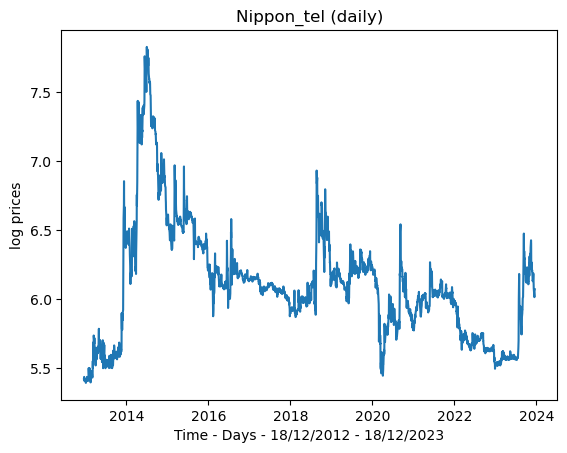

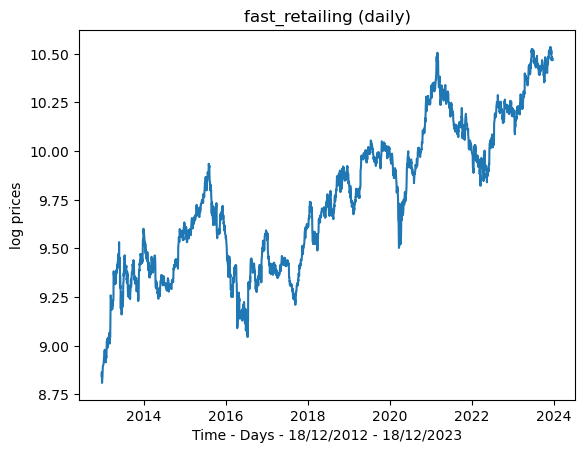

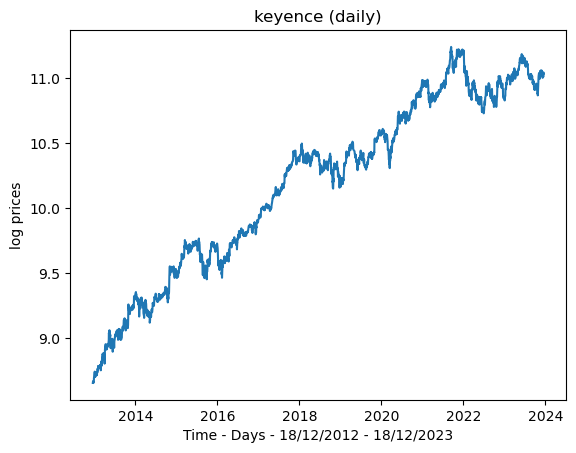

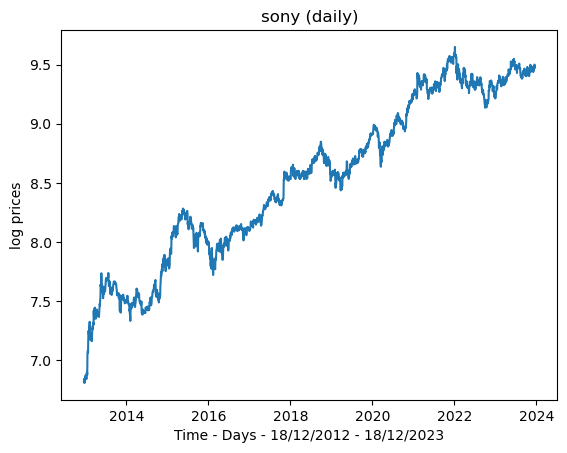

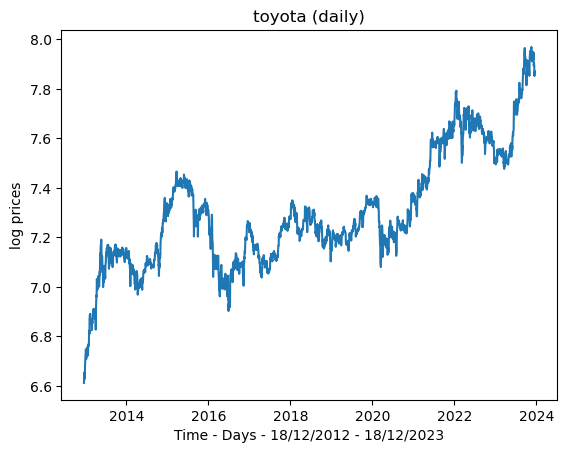

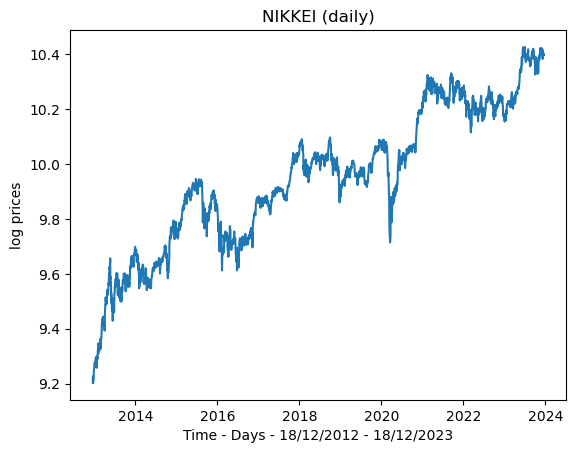

In [11]:
for equity in labels_equity:
    # Assuming equity is one of the column names in p_d
    log_equities_daily = log_equities_d[equity]
    plt.plot(t_d, log_equities_daily, label=f'{equity} Stock Price')
    plt.xlabel('Time - Days - 18/12/2012 - 18/12/2023')
    plt.ylabel('log prices')
    plt.title(equity+" (daily)")
    plt.savefig (equity + "(daily)" + ".png")
    plt.show()

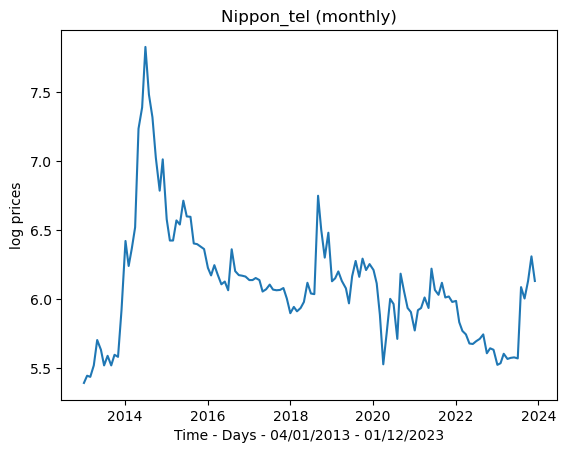

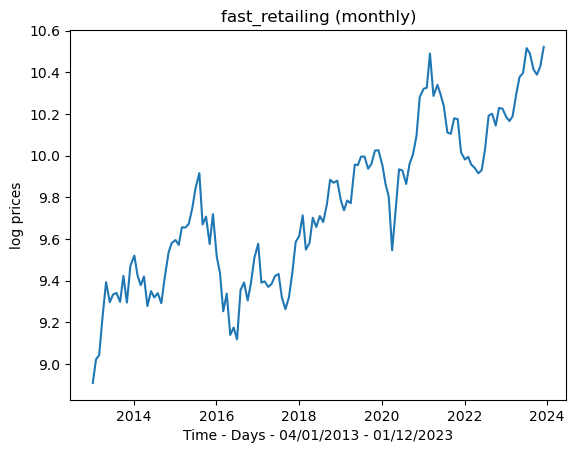

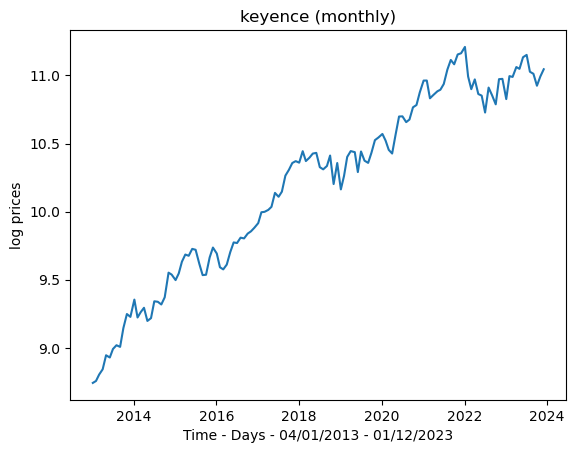

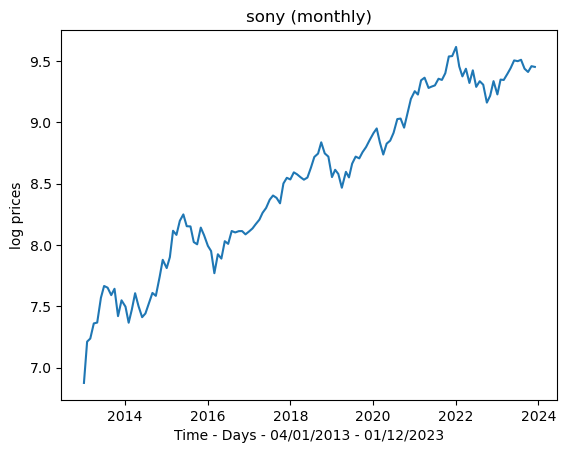

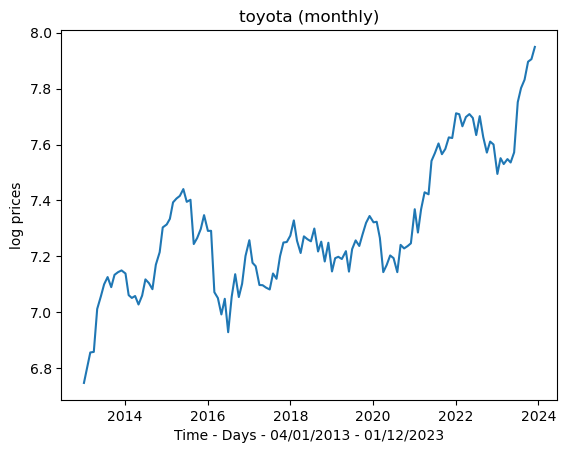

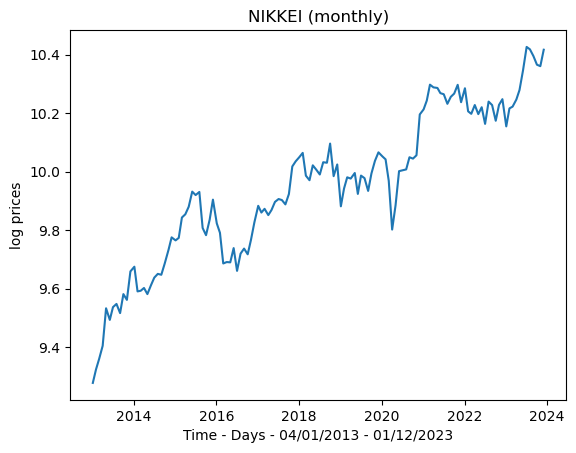

In [12]:
for equity in labels_equity:
    log_equities_monthly = log_equities_m[equity]
    plt.plot(t_m, log_equities_monthly, label=f'{equity} Stock Price')
    plt.xlabel('Time - Days - 04/01/2013 - 01/12/2023')
    plt.ylabel('log prices')
    plt.title(equity+ " (monthly)")
    plt.savefig(equity+"(monthly).png")
    plt.show()

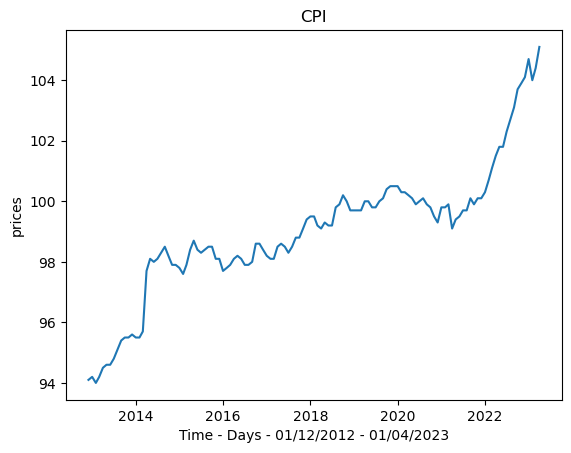

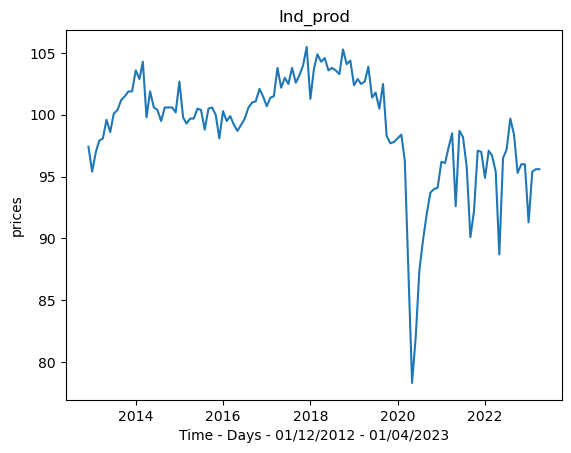

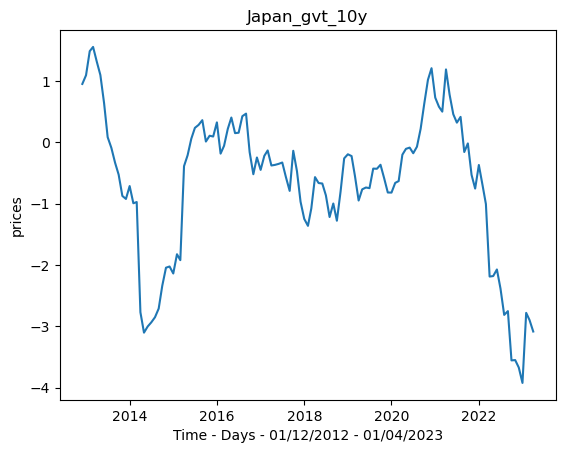

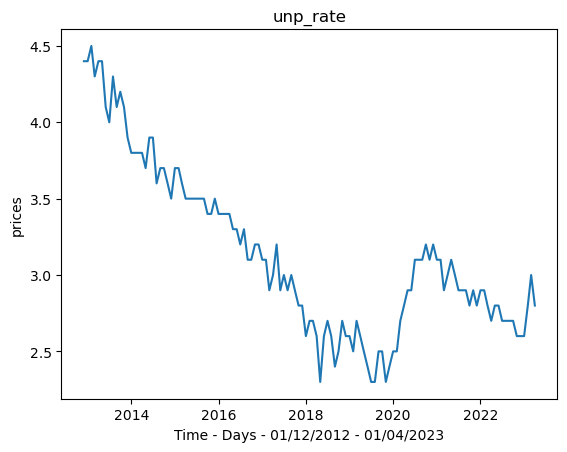

In [13]:
for econ in labels_economics:
    economics_price = economics[econ]
    plt.plot(t_e, economics_price, label=f'{econ}')
    plt.xlabel('Time - Days - 01/12/2012 - 01/04/2023')
    plt.ylabel("prices")
    plt.title(econ)
    plt.savefig(econ+".png")
    plt.show()
    

## COMPUTING RETURNS (for financial data)

In [14]:
r_d=100*(log_equities_d - log_equities_d.shift(1))
r_d

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.021551,1.902097,1.254070,1.941809,3.434948,2.364157
2,2.643326,-4.135202,0.085911,-1.615544,0.776201,-1.198746
3,-1.533436,-1.384108,-0.214915,-1.642073,-2.478927,-0.993737
4,-0.886924,3.328751,-0.994603,0.110314,-0.132188,1.399217
...,...,...,...,...,...,...
2704,-1.660774,0.646705,0.180609,0.191902,-0.891040,0.158141
2705,0.238949,-1.240851,0.081987,0.459067,-0.298786,0.251337
2706,-2.171376,0.622350,-1.037986,-1.074454,-3.889909,-0.731880
2707,4.296604,0.337838,3.450863,3.077166,1.121435,0.866026


In [15]:
return_description_d=[]
return_description_d=pd.DataFrame(return_description_d, index=labels_equity)
return_description_d['skew']=r_d.skew()
return_description_d['kurt']=r_d.kurt()
return_description_d=pd.merge(return_description_d, r_d.describe().T, left_index=True, right_index=True)
return_description_d.to_excel('daily_return_descriprion.xlsx')
return_description_d

,skew,kurt,count,mean,std,min,25%,50%,75%,max
Nippon_tel,1.260843,7.939727,2708.0,0.024047,4.444398,-23.288615,-1.722943,0.000000,1.138850,34.587301
fast_retailing,0.040965,5.455563,2708.0,0.059901,2.164005,-14.115073,-1.075928,0.013663,1.209960,16.616379
keyence,0.080235,2.013130,2708.0,0.087760,1.886460,-9.202305,-0.965404,0.019815,1.140441,10.710103
sony,0.146339,4.511633,2708.0,0.098089,2.094818,-13.684981,-1.021624,0.046604,1.158508,11.694594
toyota,0.192527,3.197195,2708.0,0.046481,1.600158,-9.061495,-0.791188,0.000000,0.838452,10.120996
NIKKEI,-0.231663,4.050568,2708.0,0.044103,1.298038,-8.252933,-0.589892,0.082557,0.722510,7.731376


In [16]:
r_m=100*(log_equities_m -log_equities_m.shift(1) )
r_m

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,NaN,NaN,NaN,NaN,NaN,NaN
1,5.220116,11.276542,1.426332,33.632465,5.369651,4.600831
2,-0.822335,2.110375,4.725288,2.550229,5.517895,3.641469
3,8.294689,18.867123,3.864326,12.304495,0.210305,4.454051
4,18.398684,16.088624,10.283024,0.697309,15.355026,12.852601
...,...,...,...,...,...,...
127,51.689084,-2.636791,-12.368956,1.118997,5.031453,-0.823299
128,-8.269172,-7.511471,-1.506743,-7.268237,2.981087,-2.314626
129,12.704488,-2.614131,-8.755158,-2.667903,6.436486,-2.949588
130,17.833677,4.044003,6.771925,4.720877,0.926104,-0.499454


In [17]:
return_description_m=[]
return_description_m=pd.DataFrame(return_description_m, index=labels_equity)
return_description_m['skew']=r_m.skew()
return_description_m['kurt']=r_m.kurt()
return_description_m=pd.merge(return_description_m, r_m.describe().T, left_index=True, right_index=True)
return_description_m.to_excel('daily_return_descriprion.xlsx')
return_description_m

,skew,kurt,count,mean,std,min,25%,50%,75%,max
Nippon_tel,1.237509,3.657334,131.0,0.564017,18.010550,-43.417521,-8.267581,-0.757579,6.033448,71.496623
fast_retailing,-0.345308,0.181412,131.0,1.230639,9.744061,-25.749318,-4.386404,1.463048,8.168038,23.679270
keyence,-0.458960,0.426416,131.0,1.757820,8.027732,-21.716714,-1.611140,2.237825,7.194755,18.479630
sony,0.022768,0.641930,131.0,1.966182,8.881760,-22.314355,-2.793757,2.550229,7.753419,33.632465
toyota,-0.486423,1.446952,131.0,0.917179,6.021629,-21.943744,-1.942289,1.037681,4.658288,17.970190
NIKKEI,-0.617780,1.157916,131.0,0.870509,5.169518,-16.677535,-1.532669,1.146598,4.337441,13.967745


In [18]:
P_e=pd.DataFrame(economics,columns=labels_economics) #DataFrame for economics price
r_e = 100*((P_e - P_e.shift(1))/P_e.shift(1)) 
r_e

,CPI,Ind_prod,Japan_gvt_10y,unp_rate
0,NaN,NaN,NaN,NaN
1,0.106270,-2.073709,14.891384,0.000000
2,-0.212314,1.677325,35.833029,2.272727
3,0.212766,0.927931,4.660077,-4.444444
4,0.318471,0.204311,-15.458751,2.325581
...,...,...,...,...
120,0.192493,0.000000,3.418442,0.000000
121,0.576369,-4.896343,6.842521,0.000000
122,-0.668577,4.491182,-29.124158,7.692308
123,0.384615,0.209666,4.195905,7.142857


In [19]:
#economics_description=r_e.iloc[1:,].describe().T

economics_description=[]
economics_description=pd.DataFrame(economics_description, index=labels_economics)
economics_description['skew']=r_e.skew()
economics_description['kurt']=r_e.kurt()
economics_description=pd.merge(economics_description, r_e.describe().T, left_index=True, right_index=True)
economics_description.to_excel('economics_return_descriprion.xlsx')
economics_description

,skew,kurt,count,mean,std,min,25%,50%,75%,max
CPI,1.934977,12.911090,124.0,0.089679,0.312738,-0.800801,-0.100730,0.100050,0.233466,2.089864
Ind_prod,-0.685876,4.384222,124.0,0.017712,2.559061,-10.104490,-0.722642,0.194105,1.121370,8.794678
Japan_gvt_10y,8.714019,88.699759,124.0,34.641721,300.246582,-492.818671,-29.307187,-0.255199,36.591140,3089.156627
unp_rate,0.268029,0.389121,124.0,-0.278245,4.158806,-11.538462,-3.333333,0.000000,2.987132,13.043478


In [20]:
#Secondo me intende questo come descrizione, forse nell'ultima tabella qui sopra i risultati sono strani ma perché non 
#abbiamo fatto secondo la scala logaritmica

In [21]:
#Le differenze che ho visto è che guardando i financial la kurtosis aumenta nel daily come dice il prof
#Poi il nikkei è meno rischioso (std basso) come dalle slide

## Jarque_Bera

In [22]:
array=[]
for equity in r_d.columns:
    ret = sp.stats.jarque_bera(r_d[equity][1:])
    array.append([ret[0],ret[1]])
jarque_bera_r_d=pd.DataFrame(array, index=r_d.columns, columns=['Stat', 'pvalue'])
#sp.stats.jarque_bera(r_d[1:])[1]    #con [1] mi restituisce il p-value  #con [0] mi restituisce la stat
jarque_bera_r_d

,Stat,pvalue
Nippon_tel,7799.442239,0.000000e+00
fast_retailing,3343.929773,0.000000e+00
keyence,457.491161,4.540008e-100
sony,2295.639278,0.000000e+00
toyota,1164.252181,1.534091e-253
NIKKEI,1866.616558,0.000000e+00


In [23]:
array=[]
for equity in r_m.columns:
    ret = sp.stats.jarque_bera(r_m[equity][1:])
    array.append([ret[0],ret[1]])
jarque_bera_r_m=pd.DataFrame(array, index=r_m.columns, columns=['Stat (monthly)', 'pvalue (monthly)'])
#sp.stats.jarque_bera(r_d[1:])[1]    #con [1] mi restituisce il p-value  #con [0] mi restituisce la stat
jarque_bera_r_m

,Stat (monthly),pvalue (monthly)
Nippon_tel,98.538589,4.005136e-22
fast_retailing,2.634869,2.678216e-01
keyence,5.220647,7.351074e-02
sony,1.798406,4.068938e-01
toyota,14.949466,5.672373e-04
NIKKEI,14.376885,7.552646e-04


In [24]:
financial_jb=pd.merge(jarque_bera_r_d, jarque_bera_r_m, left_index=True, right_index=True)
financial_jb.to_excel('Jarque Bera financial.xlsx')
financial_jb

,Stat,pvalue,Stat (monthly),pvalue (monthly)
Nippon_tel,7799.442239,0.000000e+00,98.538589,4.005136e-22
fast_retailing,3343.929773,0.000000e+00,2.634869,2.678216e-01
keyence,457.491161,4.540008e-100,5.220647,7.351074e-02
sony,2295.639278,0.000000e+00,1.798406,4.068938e-01
toyota,1164.252181,1.534091e-253,14.949466,5.672373e-04
NIKKEI,1866.616558,0.000000e+00,14.376885,7.552646e-04


In [25]:
array=[]
for equity in r_e.columns:
    ret = sp.stats.jarque_bera(r_e[equity][1:])
    array.append([ret[0],ret[1]])
jarque_bera_r_e=pd.DataFrame(array, index=r_e.columns, columns=['Stat', 'pvalue '])
#sp.stats.jarque_bera(r_d[1:])[1]    #con [1] mi restituisce il p-value  #con [0] mi restituisce la stat
jarque_bera_r_e.to_excel('jarque bera fon economics.xlsx')
jarque_bera_r_e

,Stat,pvalue
CPI,863.331147,3.388624e-188
Ind_prod,98.961026,3.242547e-22
Japan_gvt_10y,38961.954022,0.000000e+00
unp_rate,1.996629,3.685001e-01


## Returns histograms

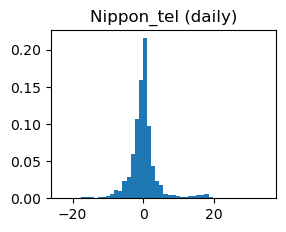

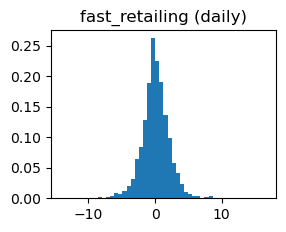

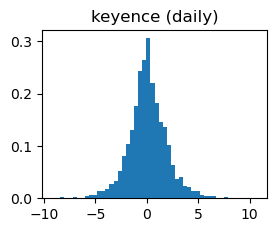

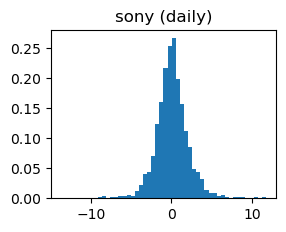

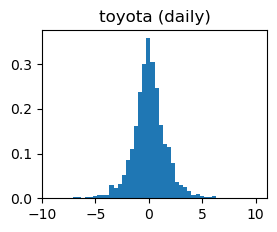

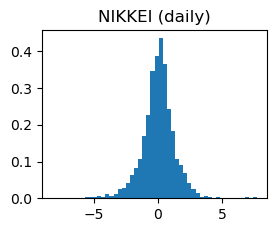

In [26]:
for equity in labels_equity:
    ax1 = plt.subplot(221)
    plt.hist(r_d[equity] , bins =50 , density = True )
    plt.title(equity+" (daily)")
    plt.savefig('fin_return_distribution_d.png')
    plt.show()

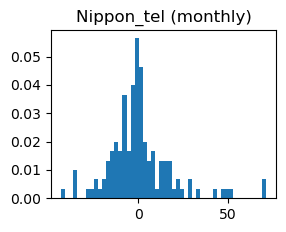

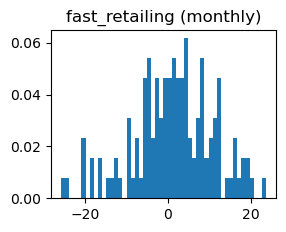

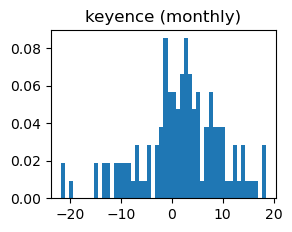

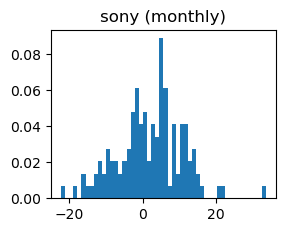

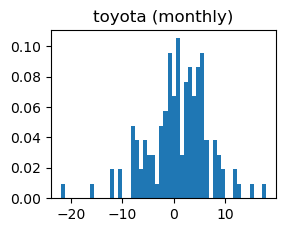

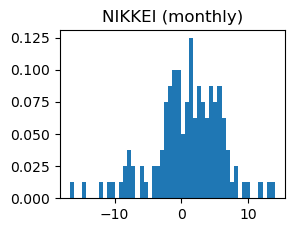

In [27]:
for equity in labels_equity:
    ax1 = plt.subplot(221)
    plt.hist(r_m[equity] , bins =50 , density = True )
    plt.title(equity+" (monthly)")
    plt.savefig('fin_return_distribution_m.png')
    plt.show()

In [28]:
#Grafici si possono fare così per le distribuzioni normali che con i buchi (come il codice precedente) non era
#bello da vedere

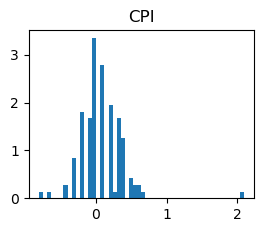

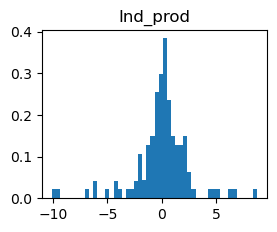

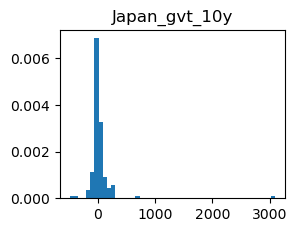

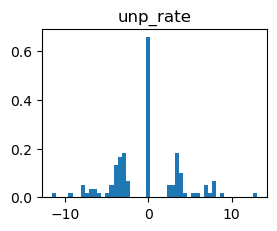

In [29]:
for equity in labels_economics:
    ax1 = plt.subplot(221)
    plt.hist(r_e[equity] , bins =50 , density = True )
    plt.title(equity)
    plt.savefig('economics_return_distribution.png')
    plt.show()

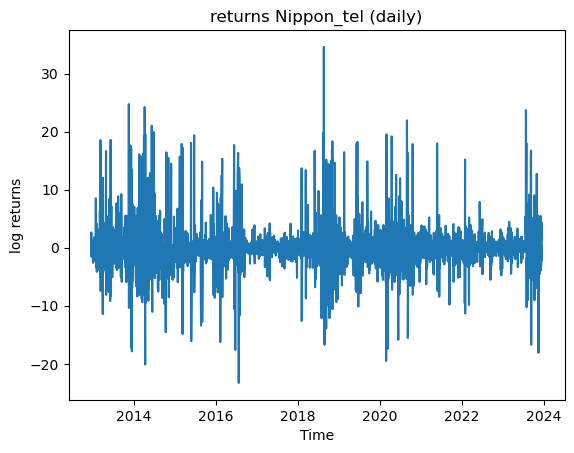

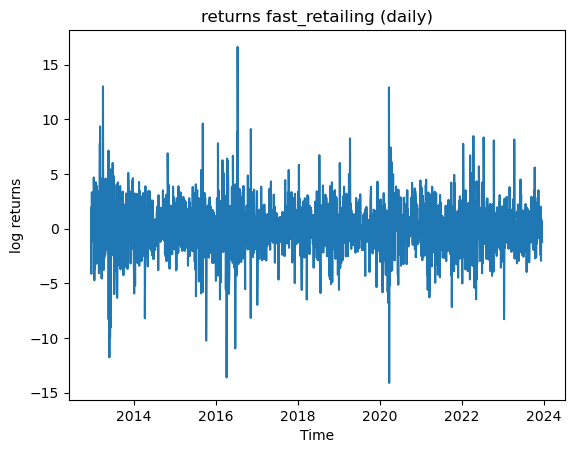

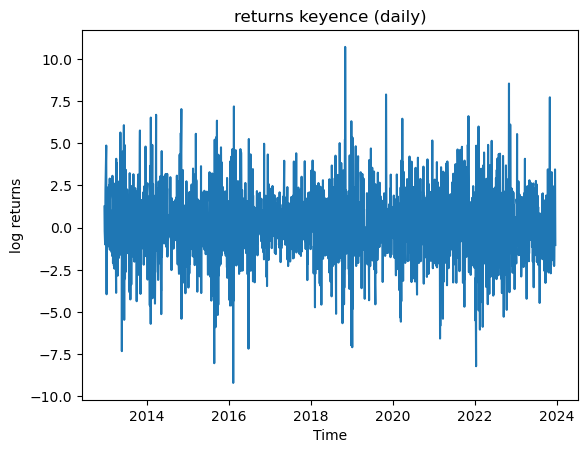

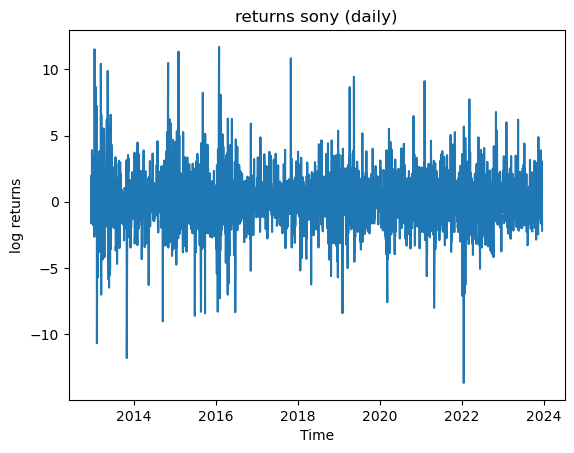

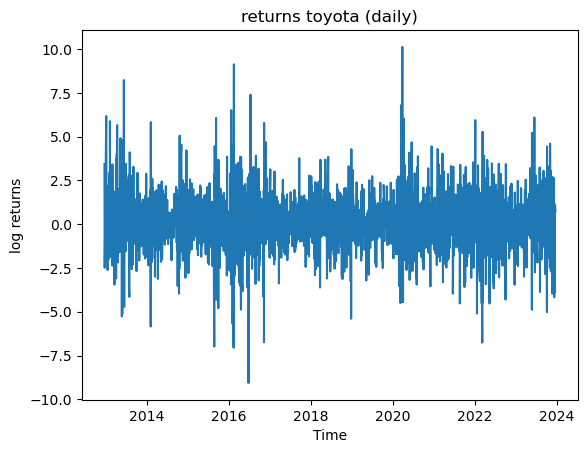

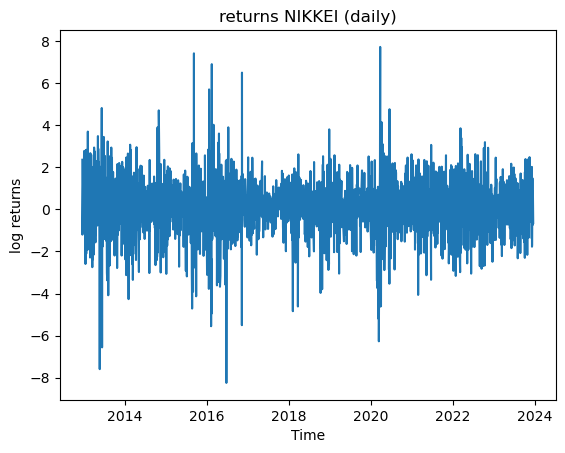

In [49]:
for equity in labels_equity:
    plt.plot(t_d[1:], r_d[equity][1:], label=f'{equity} Returns')
    plt.xlabel('Time')
    plt.ylabel('log returns')
    plt.title('returns '+equity+" (daily)")
    plt.savefig ('returns'+equity + "(daily)" + ".png")
    plt.show()

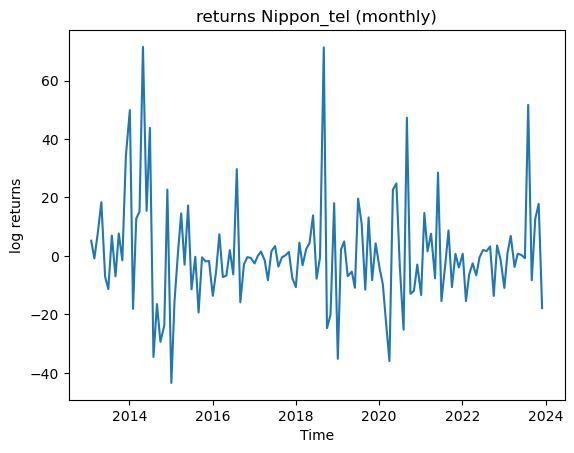

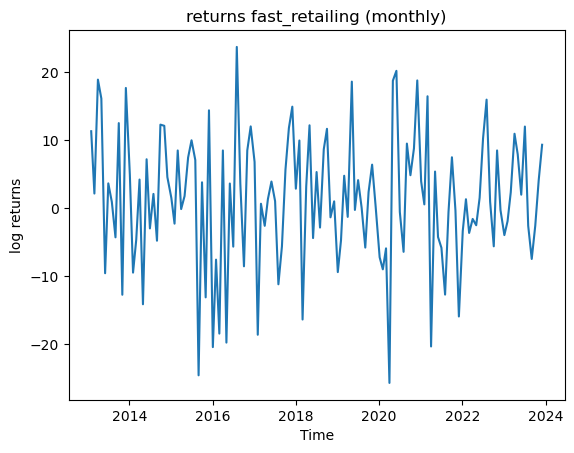

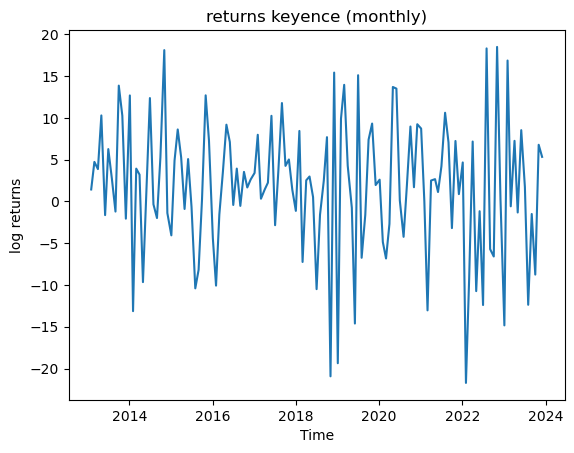

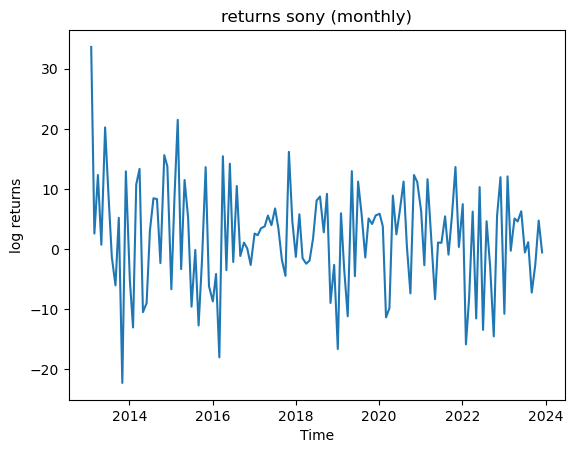

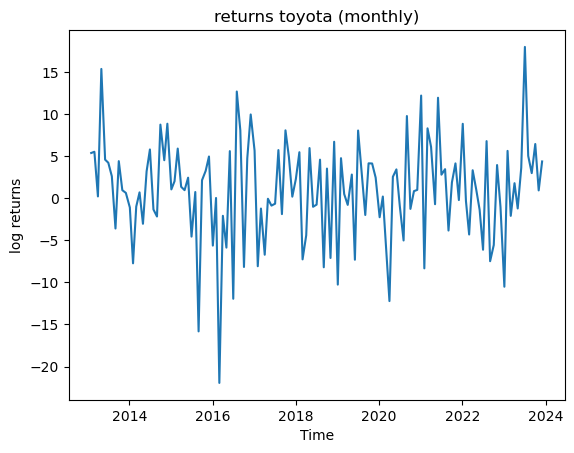

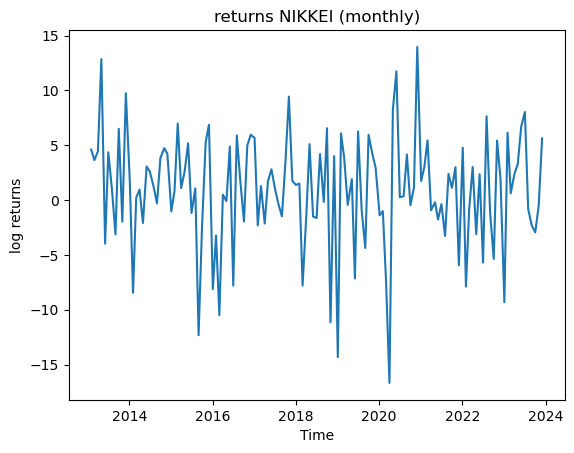

In [50]:
for equity in labels_equity:
    plt.plot(t_m[1:], r_m[equity][1:], label=f'{equity} Returns')
    plt.xlabel('Time')
    plt.ylabel('log returns')
    plt.title('returns '+equity+" (monthly)")
    plt.savefig ('returns'+equity + "(monthly)" + ".png")
    plt.show()

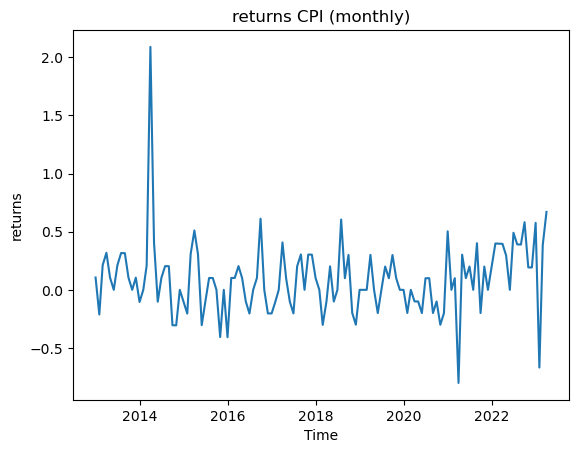

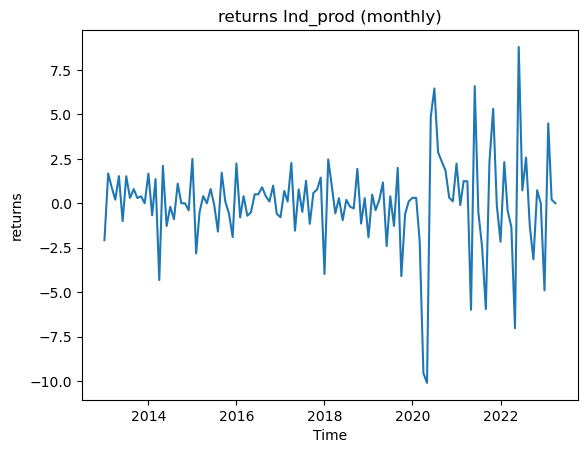

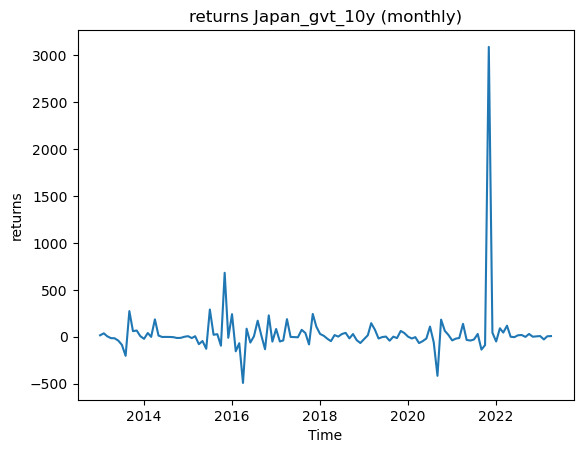

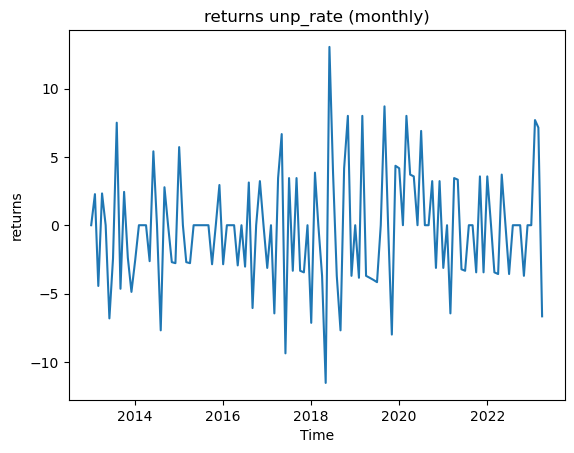

In [53]:
for econ in labels_economics:
    plt.plot(t_e[1:], r_e[econ][1:], label=f'{equity} Returns')
    plt.xlabel('Time')
    plt.ylabel('returns')
    plt.title('returns '+econ+" (monthly)")
    plt.savefig ('returns'+econ + "(monthly)" + ".png")
    plt.show()

# AUGMENTED DICKY FULLER

In [31]:
r_m_short=r_m.iloc[:108].copy()
p_m_short=log_equities_m.iloc[:108].copy()
t_m_short = t_m[:108] #removed last 2 years
p_m_short

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,5.394536,8.909235,8.742734,6.875232,6.747587,9.276887
1,5.446737,9.022001,8.756997,7.211557,6.801283,9.322896
2,5.438514,9.043104,8.804250,7.237059,6.856462,9.359310
3,5.521461,9.231776,8.842893,7.360104,6.858565,9.403851
4,5.705448,9.392662,8.945724,7.367077,7.012115,9.532377
...,...,...,...,...,...,...
103,6.033086,10.110366,11.043242,9.354441,7.603898,10.232108
104,6.120297,10.104385,11.113790,9.344871,7.565483,10.255939
105,6.013715,10.178844,11.081835,9.399720,7.584265,10.267126
106,6.021023,10.174786,11.154105,9.536041,7.625595,10.297119


In [32]:
r_d_short=r_d.iloc[:2585].copy()
p_d_short=log_equities_d.iloc[:2585].copy()
t_d_short = t_d[:2585] #removed last 6 months
p_d_short

,Nippon_tel,fast_retailing,keyence,sony,toyota,NIKKEI
0,5.421862,8.845537,8.656085,6.822197,6.612041,9.202612
1,5.411646,8.864558,8.668626,6.841615,6.646391,9.226253
2,5.438079,8.823206,8.669485,6.825460,6.654153,9.214266
3,5.422745,8.809365,8.667336,6.809039,6.629363,9.204328
4,5.413876,8.842653,8.657390,6.810142,6.628041,9.218320
...,...,...,...,...,...,...
2580,5.579730,10.485703,11.162517,9.541082,7.684094,10.404828
2581,5.598422,10.517050,11.165069,9.549309,7.745003,10.419373
2582,5.572154,10.506984,11.170013,9.543235,7.749538,10.418867
2583,5.568345,10.524333,11.170294,9.529884,7.747597,10.425433


In [33]:
r_e_short=r_e.iloc[:101].copy()
p_e_short=P_e.iloc[:101].copy()
t_e_short = t_e[:101]
p_e_short

,CPI,Ind_prod,Japan_gvt_10y,unp_rate
0,94.1,97.41,0.9529,4.4
1,94.2,95.39,1.0948,4.4
2,94.0,96.99,1.4871,4.5
3,94.2,97.89,1.5564,4.3
4,94.5,98.09,1.3158,4.4
...,...,...,...,...
96,99.3,94.09,1.2096,3.2
97,99.8,96.19,0.7301,3.1
98,99.8,96.09,0.5819,3.1
99,99.9,97.29,0.5015,2.9


In [34]:
from statsmodels.tsa.stattools import adfuller

# ADF FINANCIAL DATA

## ADF DAILY FINANCIAL DATA

In [35]:
BIC=[]
for equity in labels_equity:
    ret=adfuller(p_d_short[equity],maxlag =22, regression='c', autolag='BIC')
    ret1=adfuller(p_d_short[equity],maxlag =22, regression='ct', autolag='BIC')
    ret2=adfuller(p_d_short[equity],maxlag =22, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_df=pd.DataFrame(BIC, index=labels_equity, columns=['BIC constant', 'BIC constant and trend', 'BIC no constant no trend'])
BIC_df['deterministic part']=BIC_df.idxmin(axis=1)


BIC_df #tutti no c e no t

,BIC constant,BIC constant and trend,BIC no constant no trend,deterministic part
Nippon_tel,-8724.835359,-8722.795158,-8725.322890,BIC no constant no trend
fast_retailing,-12305.430408,-12304.461101,-12310.666785,BIC no constant no trend
keyence,-13029.589435,-13032.678164,-13034.447661,BIC no constant no trend
sony,-12516.184905,-12520.778574,-12521.799219,BIC no constant no trend
toyota,-13953.487932,-13950.831835,-13956.175887,BIC no constant no trend
NIKKEI,-14953.423093,-14959.805830,-14957.265924,BIC constant and trend


In [36]:
# faccio l'adf con 'n', 'ct' e 'c' a seconda dei risultati di prima
adf_result_d=[]
for equity in BIC_df.index:
    if BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[2]:
        ret = adfuller(p_d_short[equity],maxlag =22, regression='n')
        adf_result_d.append([ret[0],ret[1],ret[2],ret[3]])
    elif BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[1]:
        ret1= adfuller(p_d_short[equity],maxlag =22, regression='ct')
        adf_result_d.append([ret1[0],ret1[1],ret1[2],ret1[3]])
    else:
        ret2=adfuller(p_d_short[equity],maxlag =22, regression='c')
        adf_result_d.append([ret2[0],ret2[1],ret2[2],ret2[3]])        
adf_result_d=pd.DataFrame(adf_result_d, index=labels_equity, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
p_d_unit_root=[]  #store price equity with unit root
conf=0.05
for equity in adf_result_d.index:
    if adf_result_d.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')
        p_d_unit_root.append(equity)

adf_result_d['check']=solutions
adf_result_d.to_excel('ADF test for daily fin.data.xlsx')
adf_result_d


#solo NIKKEI è stazionario

,stat,pvalue,lags,obs,check
Nippon_tel,-0.105656,0.648039,7,2577,Unit root
fast_retailing,1.476286,0.965216,1,2583,Unit root
keyence,2.548900,0.998448,1,2583,Unit root
sony,2.347677,0.996718,0,2584,Unit root
toyota,1.463592,0.964285,12,2572,Unit root
NIKKEI,-4.484017,0.001603,3,2581,Stationarity


### FIRST DIFFERENCE SUI PREZZI GIORNALIERI

In [37]:
#FIRST DIFFERENCE
BIC=[]
for equity in p_d_unit_root:
    ret=adfuller(r_d_short[equity][1:],maxlag =22, regression='c', autolag='BIC')
    ret1=adfuller(r_d_short[equity][1:],maxlag =22, regression='ct', autolag='BIC')
    ret2=adfuller(r_d_short[equity][1:],maxlag =22, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_df=pd.DataFrame(BIC, index=p_d_unit_root, columns=['BIC constant', 'BIC constant and trend', 'BIC no'])
BIC_df['deterministic part']=BIC_df.idxmin(axis=1)

BIC_df    # tutti no c e no t

,BIC constant,BIC constant and trend,BIC no,deterministic part
Nippon_tel,14871.643474,14878.628341,14863.800623,BIC no
fast_retailing,11286.460447,11294.308569,11280.777568,BIC no
keyence,10563.948959,10571.119746,10562.837329,BIC no
sony,11062.060867,11069.776399,11058.913919,BIC no
toyota,9645.470004,9653.285951,9639.038698,BIC no


In [38]:
#no constant and no trend
adf_result_d_first=[]
for equity in p_d_unit_root:
    ret = adfuller(r_d_short[equity][1:],maxlag =22, regression='n', autolag='AIC')
    adf_result_d_first.append([ret[0],ret[1],ret[2],ret[3]])
adf_result_d_first=pd.DataFrame(adf_result_d_first, index=p_d_unit_root, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
for equity in adf_result_d_first.index:
    if adf_result_d_first.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')

adf_result_d_first['check']=solutions
adf_result_d_first.to_excel('ADF test first diff. daily fin. data.xlsx')

adf_result_d_first

#rigetto sempre la nulla, quindi sono tutti stazionari

,stat,pvalue,lags,obs,check
Nippon_tel,-20.675282,0.000000e+00,6,2577,Stationarity
fast_retailing,-28.302494,0.000000e+00,2,2581,Stationarity
keyence,-52.361063,0.000000e+00,0,2583,Stationarity
sony,-30.486053,0.000000e+00,2,2581,Stationarity
toyota,-17.075424,1.420531e-28,11,2572,Stationarity


## ADF monthly financial data

In [39]:
BIC=[]
for equity in labels_equity:
    ret=adfuller(p_m_short[equity],maxlag =22, regression='c', autolag='BIC')
    ret1=adfuller(p_m_short[equity],maxlag =22, regression='ct', autolag='BIC')
    ret2=adfuller(p_m_short[equity],maxlag =22, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_m_df=pd.DataFrame(BIC, index=labels_equity, columns=['BIC constant (monthly)', 'BIC constant and trend (monthly)', 'BIC no (monthly)'])
BIC_m_df['deterministic part']=BIC_m_df.idxmin(axis=1)

BIC_m_df

,BIC constant (monthly),BIC constant and trend (monthly),BIC no (monthly),deterministic part
Nippon_tel,-71.725948,-72.810997,-65.619210,BIC constant and trend (monthly)
fast_retailing,-136.383172,-135.618762,-138.565774,BIC no (monthly)
keyence,-196.992692,-201.444592,-201.356837,BIC constant and trend (monthly)
sony,-184.897625,-186.693565,-189.162844,BIC no (monthly)
toyota,-222.630252,-220.454074,-225.375877,BIC no (monthly)
NIKKEI,-249.323946,-250.451317,-251.802219,BIC no (monthly)


In [40]:
# faccio l'adf con 'n', 'ct' e 'c' a seconda dei risultati di prima
adf_result_m=[]
for equity in BIC_m_df.index:
    if BIC_m_df.at[equity,BIC_m_df.columns[3]]==BIC_m_df.columns[2]:
        ret = adfuller(p_m_short[equity],maxlag =12, regression='n')
        adf_result_m.append([ret[0],ret[1],ret[2],ret[3]])
    elif BIC_m_df.at[equity,BIC_m_df.columns[3]]==BIC_m_df.columns[1]:
        ret1= adfuller(p_m_short[equity],maxlag =12, regression='ct')
        adf_result_m.append([ret1[0],ret1[1],ret1[2],ret1[3]])
    else:
        ret2=adfuller(p_m_short[equity],maxlag =12, regression='c')
        adf_result_m.append([ret2[0],ret2[1],ret2[2],ret2[3]])        
adf_result_m=pd.DataFrame(adf_result_m, index=labels_equity, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
p_m_unit_root=[]  #store price equity with unit root
conf=0.05
for equity in adf_result_m.index:
    if adf_result_m.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')
        p_m_unit_root.append(equity)

# devo creare un dataframe con i dati delle p_m_unit_root
r_m_short_unit_root=r_m_short[p_m_unit_root]

adf_result_m['check']=solutions
adf_result_m.to_excel('ADF test for monthly fin.data.xlsx')
adf_result_m

,stat,pvalue,lags,obs,check
Nippon_tel,-2.962068,0.142997,0,107,Unit root
fast_retailing,0.953978,0.909425,0,107,Unit root
keyence,-3.567201,0.032731,0,107,Stationarity
sony,2.777436,0.999416,0,107,Unit root
toyota,1.431607,0.961856,1,106,Unit root
NIKKEI,1.717364,0.979694,0,107,Unit root


### FIRST DIFFERENCE SUI MONTHLY FIN. DATA

In [41]:
#FIRST DIFFERENCE
BIC=[]
for equity in p_m_unit_root:
    ret=adfuller(r_m_short[equity][1:],maxlag =12, regression='c', autolag='BIC')
    ret1=adfuller(r_m_short[equity][1:],maxlag =12, regression='ct', autolag='BIC')
    ret2=adfuller(r_m_short[equity][1:],maxlag =12, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_df=pd.DataFrame(BIC, index=p_m_unit_root, columns=['BIC constant', 'BIC constant and trend', 'BIC no'])
BIC_df['deterministic part']=BIC_df.idxmin(axis=1)

BIC_df  

,BIC constant,BIC constant and trend,BIC no,deterministic part
Nippon_tel,826.469418,830.937233,821.953192,BIC no
fast_retailing,712.638877,717.172098,708.514312,BIC no
sony,663.726869,668.269230,667.465040,BIC constant
toyota,612.950989,616.967734,609.582769,BIC no
NIKKEI,583.496929,588.032457,580.755526,BIC no


In [42]:
# faccio l'adf con 'n', 'ct' e 'c' a seconda dei risultati di prima
adf_result_m_first=[]
for equity in BIC_df.index:
    if BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[2]:
        ret = adfuller(r_m_short[equity][1:],maxlag =12, regression='n')
        adf_result_m_first.append([ret[0],ret[1],ret[2],ret[3]])
    elif BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[1]:
        ret1= adfuller(r_m_short[equity][1:],maxlag =12, regression='ct')
        adf_result_m_first.append([ret1[0],ret1[1],ret1[2],ret1[3]])
    else:
        ret2=adfuller(r_m_short[equity][1:],maxlag =12, regression='c')
        adf_result_m_first.append([ret2[0],ret2[1],ret2[2],ret2[3]])        
adf_result_m_first=pd.DataFrame(adf_result_m_first, index=p_m_unit_root, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
for equity in adf_result_m_first.index:
    if adf_result_m_first.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')

adf_result_m_first['check']=solutions
adf_result_m_first.to_excel('ADF first difference for monthly fin.data.xlsx')
adf_result_m_first

,stat,pvalue,lags,obs,check
Nippon_tel,-10.941961,9.497049e-20,0,106,Stationarity
fast_retailing,-11.100168,4.457313e-20,0,106,Stationarity
sony,-11.754098,1.189967e-21,0,106,Stationarity
toyota,-11.345876,1.400045e-20,0,106,Stationarity
NIKKEI,-10.588440,5.295922e-19,0,106,Stationarity


# ADF for economics value

# ADF for economics levels (monthly)

In [43]:
# capisco se aggiungere o meno la costante
BIC=[]
for equity in labels_economics:
    ret=adfuller(p_e_short[equity],maxlag =12, regression='c', autolag='BIC')
    ret1=adfuller(p_e_short[equity],maxlag =12, regression='ct', autolag='BIC')
    ret2=adfuller(p_e_short[equity],maxlag =12, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_df=pd.DataFrame(BIC, index=labels_economics, columns=['BIC constant', 'BIC constant and trend', 'BIC no constant no trend'])
BIC_df['deterministic part']=BIC_df.idxmin(axis=1)


BIC_df #tutti no c e no t

,BIC constant,BIC constant and trend,BIC no constant no trend,deterministic part
CPI,45.112761,45.587288,49.748292,BIC constant
Ind_prod,383.486898,387.157872,383.544284,BIC constant
Japan_gvt_10y,80.088866,81.924664,75.674611,BIC no constant no trend
unp_rate,-115.066694,-110.998136,-116.194375,BIC no constant no trend


In [44]:
adf_result_e=[]
for equity in BIC_df.index:
    if BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[2]:
        ret = adfuller(p_e_short[equity],maxlag =12, regression='n')
        adf_result_e.append([ret[0],ret[1],ret[2],ret[3]])
    elif BIC_df.at[equity,BIC_df.columns[3]]==BIC_df.columns[1]:
        ret1= adfuller(p_e_short[equity],maxlag =12, regression='ct')
        adf_result_e.append([ret1[0],ret1[1],ret1[2],ret1[3]])
    else:
        ret2=adfuller(p_e_short[equity],maxlag =12, regression='c')
        adf_result_e.append([ret2[0],ret2[1],ret2[2],ret2[3]])        
adf_result_e=pd.DataFrame(adf_result_e, index=labels_economics, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
p_e_unit_root=[]  #store price equity with unit root
conf=0.05
for equity in adf_result_e.index:
    if adf_result_e.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')
        p_e_unit_root.append(equity)

# devo creare un dataframe con i dati delle p_m_unit_root
r_e_short_unit_root=r_e_short[p_e_unit_root]

adf_result_e['check']=solutions
adf_result_e.to_excel('ADF test for monthly economics.data.xlsx')
adf_result_e

,stat,pvalue,lags,obs,check
CPI,-2.998547,0.035030,2,98,Stationarity
Ind_prod,-2.643630,0.084311,1,99,Unit root
Japan_gvt_10y,-1.977480,0.045874,12,88,Stationarity
unp_rate,-1.549092,0.114085,12,88,Unit root


# ADF FIRST DIFFERENCE 

In [45]:
#FIRST DIFFERENCE
BIC=[]
for equity in p_e_unit_root:
    ret=adfuller(r_e_short[equity][1:],maxlag =12, regression='c', autolag='BIC')
    ret1=adfuller(r_e_short[equity][1:],maxlag =12, regression='ct', autolag='BIC')
    ret2=adfuller(r_e_short[equity][1:],maxlag =12, regression='n', autolag='BIC')
    BIC.append([ret[5],ret1[5],ret2[5]])
BIC_df=pd.DataFrame(BIC, index=p_e_unit_root, columns=['BIC constant', 'BIC constant and trend', 'BIC no'])
BIC_df['deterministic part']=BIC_df.idxmin(axis=1)

BIC_df 

,BIC constant,BIC constant and trend,BIC no,deterministic part
Ind_prod,393.476706,397.862005,389.025651,BIC no
unp_rate,506.092856,507.655315,502.074855,BIC no


In [46]:
adf_result_e_first=[]
for equity in BIC_df.index:
    ret = adfuller(r_e_short[equity][1:],maxlag =12, regression='n')
    adf_result_e_first.append([ret[0],ret[1],ret[2],ret[3]])
adf_result_e_first=pd.DataFrame(adf_result_e_first, index=BIC_df.index, columns=['stat','pvalue','lags', 'obs'])

solutions=[]
for equity in adf_result_e_first.index:
    if adf_result_e_first.at[equity,'pvalue']<conf:
        solutions.append('Stationarity')
    else:
        solutions.append('Unit root')

adf_result_e_first['check']=solutions
adf_result_e_first.to_excel('ADF first diff. for monthly economics.data.xlsx')
adf_result_e_first

,stat,pvalue,lags,obs,check
Ind_prod,-7.024523,5.337315e-11,2,97,Stationarity
unp_rate,-3.171440,1.516554e-03,11,88,Stationarity
